In [ ]:
##

In [1]:
import os
os.environ['SPECIES'] = "Mouse"
from eval.visual_utils import (get_naming_dict, filter_dataframe, FigureStyle, pval2stars, Naming_Json, export_to_excel)
njson = Naming_Json()
exp = njson.exp
exp_short = exp.split("_")[0]
m_param_json_file = f"/g/data/yr31/zs2131/tasks/2023/RNA_expr_net/anal_mouse/training/{exp_short}/{exp}.param_config.json"
os.environ['PARAM_JSON_FILE'] = m_param_json_file

from utils.utils import get_device, get_model, get_config
from utils.params import params

import glob
import csv
import re
import numpy as np
import pandas as pd
import pickle
from eval.eval_utils import print_uniq_value_of_each_column
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
params = params()
config = get_config()
epoch =njson.epoch

Using mouse project folder: /g/data/yr31/zs2131/tasks/2023/RNA_expr_net/GeneRAIN_Mouse
Using mouse project folder: /g/data/yr31/zs2131/tasks/2023/RNA_expr_net/GeneRAIN_Mouse
Using mouse project folder: /g/data/yr31/zs2131/tasks/2023/RNA_expr_net/GeneRAIN_Mouse


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_loss(combined_df, title=None, output_file=None):
    # Separate data into train and validation loss
    train_loss = combined_df[combined_df['tag'] == 'Reduced_train_loss']
    val_loss = combined_df[combined_df['tag'] == 'Reduced_val_loss']
    style = FigureStyle()
    style.apply()
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(njson.get("half_fig_width"), njson.get("fig_height_a0")))
    
    # Plot train loss
    sns.lineplot(data=train_loss, x='global_step', y='scalar_value', label='Train Loss', ax=ax)
    
    # Plot validation loss
    sns.lineplot(data=val_loss, x='global_step', y='scalar_value', label='Validation Loss', ax=ax)
    if title == None:
        title = 'Train vs Validation Loss'
    # Use FigureStyle's methods to set titles, labels, and legend
    style.set_titles(ax, title)
    style.set_labels(ax, 'Epoch', 'Loss')
    style.update_legend_style(ax)
    if output_file != None:
        style.save_figure(output_file)
    # Show the plot
    plt.show()


In [13]:
exp_names = {
    njson.exp: "GPT model training on mixed human and mouse protein-coding genes",
    njson.exp_hm_bert: "BERT model training on mixed human and mouse protein-coding genes",
    njson.exp_hm_gpt_lncrna: "GPT model on mixed human and mouse coding, lncRNA, and pseudo genes",
    njson.exp_gpt_merge0: "GPT model on mixed human and mouse protein-coding genes (shared emb.)",
    njson.exp_mouse_gpt: "GPT model training on mouse-only protein-coding genes"
}

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


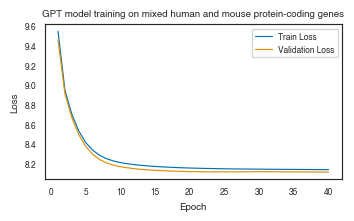

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


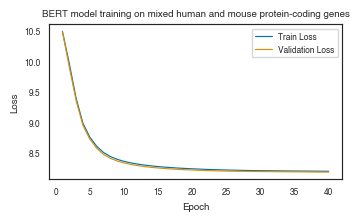

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


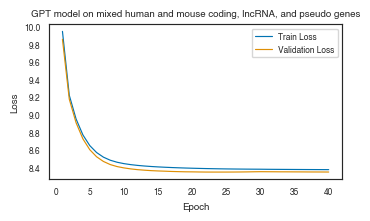

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


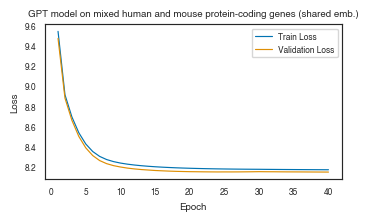

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


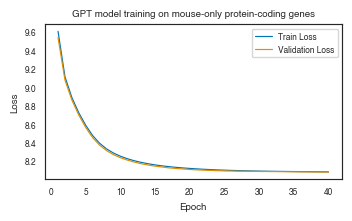

In [14]:

for exp in exp_names.keys():
    csv_files = glob.glob(f"{config.proj_path}//results/logs/pretrain/{exp}/reduced_loss/Data.events.out.tfevents*.data.csv")
    # Read each CSV file and store each as a DataFrame
    dfs = [pd.read_csv(file) for file in csv_files]
    
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    plot_loss(combined_df, title=exp_names[exp], output_file=f"{config.proj_path}/results/figures_tables/loss_vs_epochs/Loss.{exp}.epoch.pdf")